<a href="https://colab.research.google.com/github/Saymanning/Honey_Bee_Colony_Loss_US/blob/Machine-Learning/FBprophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install prophet

     |████████████████████████████████| 65 kB 2.9 MB/s 
     |████████████████████████████████| 49 kB 4.9 MB/s 
     |████████████████████████████████| 179 kB 52.6 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6639815 sha256=6743c020481a3b61b0ed0e07e5b76e8b87d6aac24f512bc3e5afd56b1f54891f
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


In [33]:
import pandas as pd
from pandas import to_datetime
from pandas import DataFrame
from prophet import Prophet
from matplotlib import pyplot

In [34]:
data = "https://raw.githubusercontent.com/Saymanning/Honey_Bee_Colony_Loss_US/main/Resources/Clean_Bee_Pop.csv"

In [35]:
# Import our input dataset
Clean_Bee_Pop_df = pd.read_csv(data)
Clean_Bee_Pop_df.head()

,Year,State,colonies,Maximum_colonies1,Lost_colonies,Percent_lost2,Varroa_mites,Other_parasites,Diseases,Pestticides,Other3,Unknown,POPULATION
0,2015,AL,8000,8000,610,8,3,6,0,0,3,2,4852347
1,2015,AZ,36000,39000,12000,31,50,2,1,4,1,16,6829676
2,2015,AR,23000,27000,2400,9,38,10,0,8,9,1,2978048
3,2015,CA,750000,1260000,149000,12,37,13,6,12,11,7,38918045
4,2015,CO,24000,24000,2500,10,48,24,21,20,8,2,5450623


In [36]:
# load the dataset
from pandas import read_csv
# load data
path = "https://raw.githubusercontent.com/Saymanning/Honey_Bee_Colony_Loss_US/main/Resources/Clean_Bee_Pop.csv"
df = read_csv(path, header=0)
# summarize shape
print(df.shape)
# show first few rows
print(df.head())

(225, 13)
   Year State  colonies  ...  Other3  Unknown  POPULATION
0  2015    AL      8000  ...       3        2     4852347
1  2015    AZ     36000  ...       1       16     6829676
2  2015    AR     23000  ...       9        1     2978048
3  2015    CA    750000  ...      11        7    38918045
4  2015    CO     24000  ...       8        2     5450623

[5 rows x 13 columns]


In [37]:
df.drop(['State','colonies','Maximum_colonies1','Percent_lost2','Varroa_mites','Other_parasites','Diseases','Pestticides','Other3','Unknown'],axis=1, inplace=True)

In [38]:
df.head()

,Year,Lost_colonies,POPULATION
0,2015,610,4852347
1,2015,12000,6829676
2,2015,2400,2978048
3,2015,149000,38918045
4,2015,2500,5450623


In [39]:
df.drop('POPULATION',axis=1, inplace=True)

In [40]:
df.head()

,Year,Lost_colonies
0,2015,610
1,2015,12000
2,2015,2400
3,2015,149000
4,2015,2500


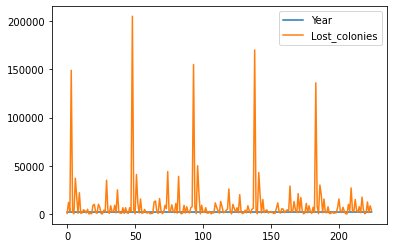

In [41]:
# plot the time series
df.plot()
pyplot.show()

In [51]:
# prepare expected column names
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])
# define the model
model = Prophet()
# fit the model
model.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [53]:
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
	date = '2015-%02d' % i
	future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
pyplot.show()

ValueError: ignored